In [ ]:
# !conda install geopandas

Solving environment: / 

### 이쁜 분석 툴

In [10]:
# arcGIS -> 분석 이쁜 것들 툴 (한글 지도는 잘안됨)

In [11]:
# power Gis 

In [2]:
%matplotlib inline

In [22]:
%matplotlib notebook

In [23]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


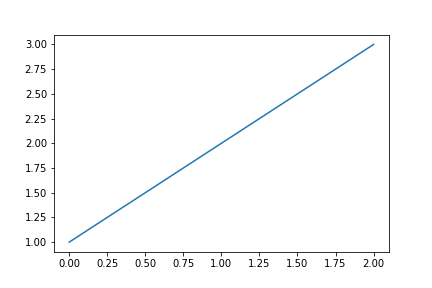

In [24]:
plt.plot([1,2,3])

### Geopandas

- (분산처리가 가능하다)
- https://dask.org/ 

In [1]:
import geopandas as gpd

In [13]:
dir(gpd)
# 연습용 데이터 datasets
dir(gpd.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_available_dir',
 '_available_zip',
 '_module_path',
 'available',
 'get_path',
 'os']

In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [31]:
# 판다스 composition (객체지향) -> 같이쓸수 있도록 만들어 놓았다. 
type(world)

geopandas.geodataframe.GeoDataFrame

In [32]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [34]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [35]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
pop_est       177 non-null float64
continent     177 non-null object
name          177 non-null object
iso_a3        177 non-null object
gdp_md_est    177 non-null float64
geometry      177 non-null object
dtypes: float64(2), object(4)
memory usage: 8.4+ KB


In [33]:
world_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [37]:
world_cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


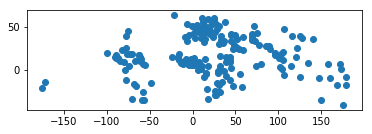

In [7]:
world_cities.plot()

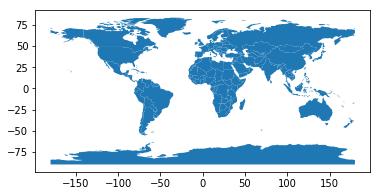

In [8]:
world.plot()

In [40]:
# 중앙점을 알려준다. 
world.centroid.head()

0      POINT (66.08669022192834 33.85639928169076)
1     POINT (17.47057255231345 -12.24586903613316)
2      POINT (20.03242643144321 41.14135330604877)
3      POINT (54.20671476159633 23.86863365334761)
4    POINT (-65.17536077114174 -35.44682148949509)
dtype: object

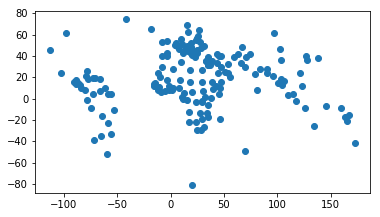

In [9]:
# centroid -> 지역의 중심 
world['centroid_column'] = world.centroid 
world = world.set_geometry('centroid_column') 
world.plot()

In [10]:
world.geometry.name

'centroid_column'

In [44]:
# 어떤 위치정보데이터를 읽는지 알려주는 것 
import fiona

In [45]:
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

<IPython.core.display.Javascript object>


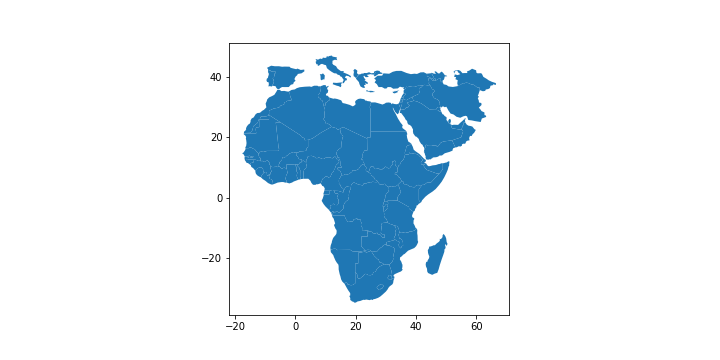

In [65]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
southern_world = world.cx[-20:60,-40:40] # 넘파이이기 때문에 슬라이싱을 할 수 있다.
southern_world.plot(figsize=(10, 5)) # matplotlib 크기를 figsize 

In [14]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


<IPython.core.display.Javascript object>


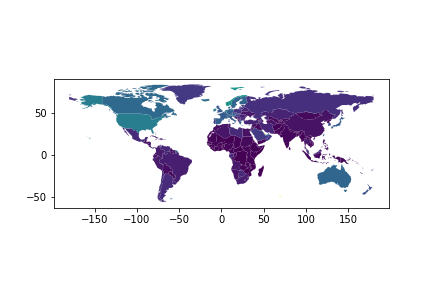

In [66]:
# geopandas 조건 쓸 수 있다. 
# 지도 데이터가 있어야한다. 

world = world[(world.pop_est>0) & (world.continent!="Antarctica")] 
# broadcasting - 행 맞춰주는 것 
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est 
world.plot(column='gdp_per_cap')

<IPython.core.display.Javascript object>


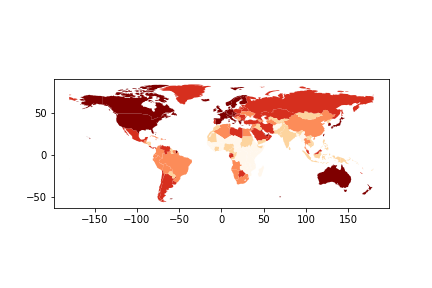

In [67]:
# cmap 오렌지 계열 (색 정할 수 있다.)
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

In [79]:
# arcGIS 서울지도를 다운 받은 것 
seoul = gpd.read_file('asset/seoul_shp', engine='python', encoding='utf-8')

<IPython.core.display.Javascript object>


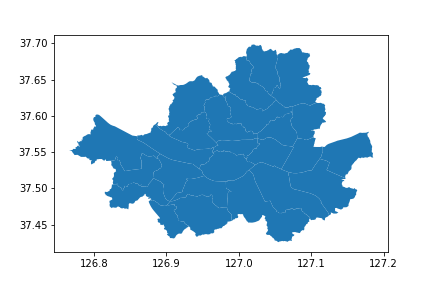

In [80]:
seoul.plot()

<IPython.core.display.Javascript object>


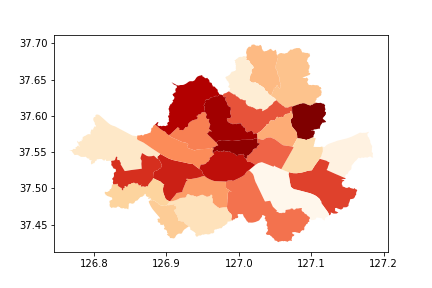

In [76]:
seoul.plot(column='name', cmap='OrRd')

In [82]:
seoul.head()

,code,name,name_eng,base_year,geometry
0,11250,강동구,Gangdong-gu,2013,"POLYGON ((127.1151958498161 37.55753318070492,..."
1,11240,송파구,Songpa-gu,2013,"POLYGON ((127.0690698130372 37.52227942350503,..."
2,11230,강남구,Gangnam-gu,2013,"POLYGON ((127.058673592884 37.52629974922568, ..."
3,11220,서초구,Seocho-gu,2013,"POLYGON ((127.0139711966751 37.52503988289669,..."
4,11210,관악구,Gwanak-gu,2013,"POLYGON ((126.9610898906183 37.49100376129394,..."


In [93]:
seoul[seoul.name=='강남구'].geometry

2    POLYGON ((127.058673592884 37.52629974922568, ...
Name: geometry, dtype: object

In [96]:
seoul[seoul.name=='강남구'].geometry.representative_point()

2    POINT (127.0584983753008 37.49596105443298)
dtype: object

In [97]:
seoul['coords'] = seoul['geometry'].apply(lambda x: x.representative_point().coords[:])
# representative_point : 중심점 찾아준다. (대표점)
# coords: 새로운 코드만 뽑아내는 것 

seoul['coords'] = [coords[0] for coords in seoul['coords']]

In [101]:
seoul['coords'].head()

0      (127.14965459147774, 37.5458145865803)
1    (127.10957091651335, 37.501524726531805)
2     (127.05849837530079, 37.49596105443298)
3    (127.01525250095538, 37.475284511024014)
4     (126.95280839655175, 37.46264950597657)
Name: coords, dtype: object

<IPython.core.display.Javascript object>


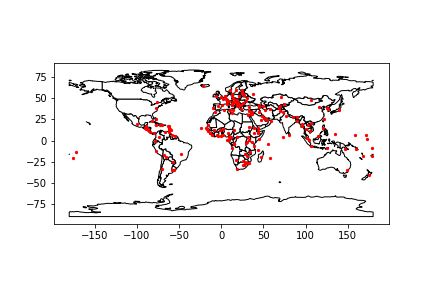

In [84]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities')) 
 

base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5);

In [80]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


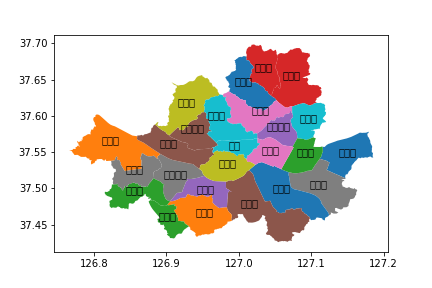

In [103]:
seoul.plot(column='name')
for idx, row in seoul.iterrows():    # itterows (3총사)
    plt.annotate(s=row['name'], xy=row['coords'],
                 horizontalalignment='center')

In [114]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(font_list)

['C:\\WINDOWS\\Fonts\\BELL.TTF', 'C:\\Windows\\Fonts\\CALIFR.TTF', 'C:\\Windows\\Fonts\\sylfaen.ttf', 'C:\\WINDOWS\\Fonts\\courbi.ttf', 'C:\\Windows\\Fonts\\ARLRDBD.TTF', 'C:\\Windows\\Fonts\\HoboStd.otf', 'C:\\WINDOWS\\Fonts\\AdobeArabic-Italic.otf', 'C:\\Windows\\Fonts\\H2PORM.TTF', 'C:\\WINDOWS\\Fonts\\AdobeFanHeitiStd-Bold.otf', 'C:\\WINDOWS\\Fonts\\HMKMRHD.TTF', 'C:\\Windows\\Fonts\\LTYPEBO.TTF', 'C:\\WINDOWS\\Fonts\\PALSCRI.TTF', 'C:\\WINDOWS\\Fonts\\AGaramondPro-BoldItalic.otf', 'C:\\WINDOWS\\Fonts\\FRAMDCN.TTF', 'C:\\Windows\\Fonts\\NGULIM.TTF', 'C:\\Windows\\Fonts\\mmrtext.ttf', 'C:\\Windows\\Fonts\\Candaraz.ttf', 'C:\\Windows\\Fonts\\210 동화책R.ttf', 'C:\\WINDOWS\\Fonts\\H2GSRB.TTF', 'C:\\WINDOWS\\Fonts\\ERASLGHT.TTF', 'C:\\WINDOWS\\Fonts\\H2HDRM.TTF', 'C:\\WINDOWS\\Fonts\\JUICE___.TTF', 'C:\\WINDOWS\\Fonts\\BirchStd.otf', 'C:\\WINDOWS\\Fonts\\LSANS.TTF', 'C:\\Windows\\Fonts\\COPRGTB.TTF', 'C:\\WINDOWS\\Fonts\\MTEXTRA.TTF', 'C:\\WINDOWS\\Fonts\\AdobeDevanagari-Regular.otf', 'C:

In [105]:
import matplotlib.font_manager as fm
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)



In [106]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


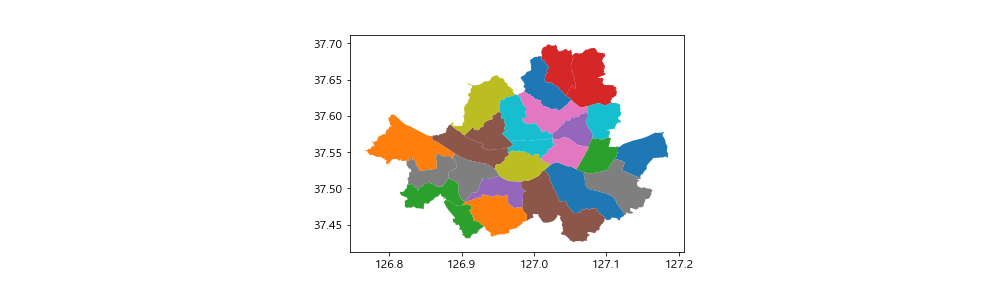

In [107]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
seoul.plot(ax= ax, column='name')


In [112]:
seoul_x = seoul.centroid.apply(lambda p: p.x)
seoul_y = seoul.centroid.apply(lambda p: p.y)

In [113]:
len(seoul_x)

25

In [109]:
seoulcen = seoul.copy()
seoulcen['geometry'] = seoul.geometry.centroid

<IPython.core.display.Javascript object>


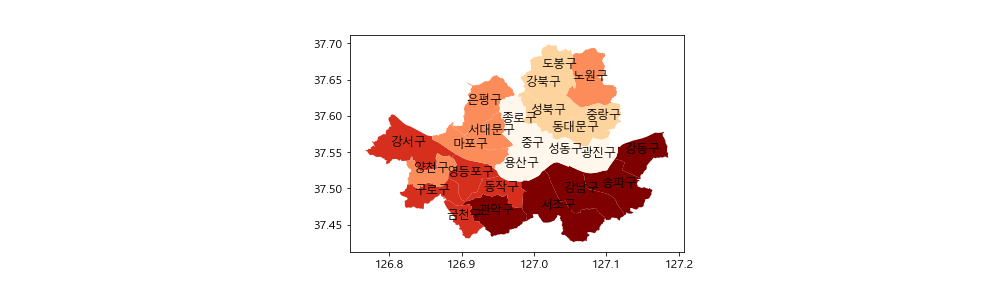

In [110]:
seoul.plot(column='code', cmap='OrRd', scheme='quantiles')
for idx, row in seoulcen.iterrows():
    plt.annotate(s=row['name'], xy=[row['geometry'].x,row['geometry'].y],
                 horizontalalignment='center')
    
    
# 이것은 분석하는 것 
# 시스템은 또 다른 지도상에 표시해서 시스템상에 써야한다. 

In [35]:
for name,centroid in zip(seoul.name,seoul.centroid):
    print(i)
    #plt.text(centroid, name, fontsize=12)

24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24


In [111]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [108]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check original projection
# (it's Platte Carre! x-y are long and lat)
world.crs

{'init': 'epsg:4326'}

Text(0.5,1,'WGS84 (lat/lon)')

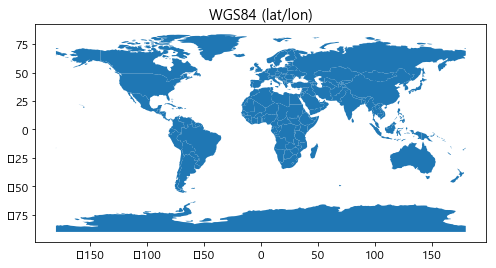

In [109]:
# Visualize
ax = world.plot()

ax.set_title("WGS84 (lat/lon)")

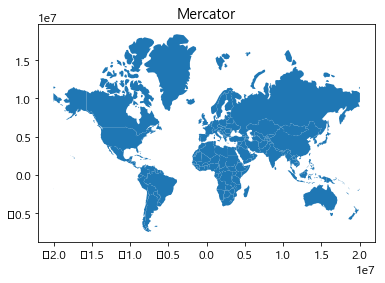

In [110]:
# Reproject to Mercator (after dropping Antartica)
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

world = world.to_crs({'init': 'epsg:3395'}) # world.to_crs(epsg=3395) would also work

ax = world.plot()

ax.set_title("Mercator");

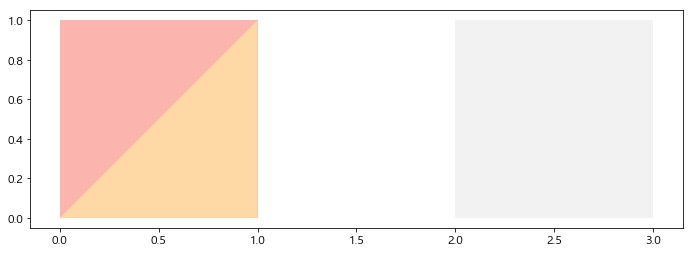

In [111]:
from shapely.geometry import Polygon

p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])

g = gpd.GeoSeries([p1, p2, p3])
g.plot(cmap='Pastel1')


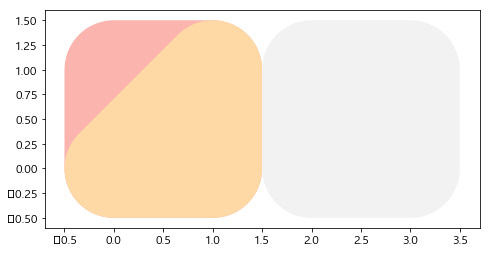

In [112]:
g.buffer(0.5).plot(cmap='Pastel1')

In [113]:
nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.GeoDataFrame.from_file(nybb_path) 
boros.set_index('BoroCode', inplace=True)
boros = boros.sort_index()
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...
3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...


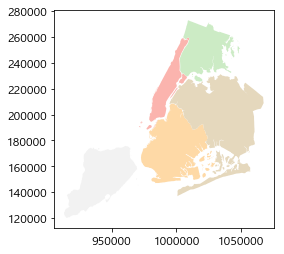

In [114]:
boros.plot(cmap='Pastel1')

In [115]:
from shapely.geometry import Point
import numpy as np

xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000

xc = (xmax - xmin) * np.random.random(2000) + xmin

yc = (ymax - ymin) * np.random.random(2000) + ymin 

pts = gpd.GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

In [116]:
circles = pts.buffer(2000)

In [117]:
mp = circles.unary_union

In [118]:
holes = boros['geometry'].intersection(mp)

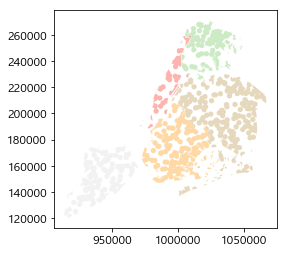

In [119]:
holes.plot(cmap='Pastel1')

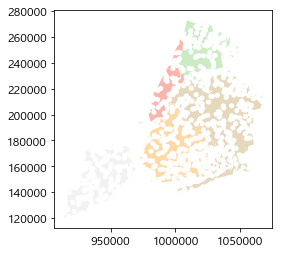

In [120]:
circles = pts.buffer(2000) # 2000 안에 있는 Points만 남김

mp = circles.unary_union # circles를 하나로 합침

boros_with_holes = boros['geometry'].difference(mp)

boros_with_holes.plot(cmap='Pastel1')

In [121]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry']]
continents = world.dissolve(by='continent')
continents.head()

,geometry
continent,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1..."


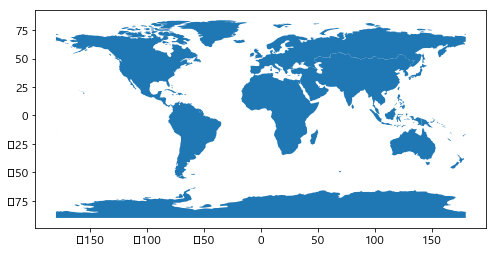

In [122]:
continents.plot()

In [123]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
continents = world.dissolve(by='continent', aggfunc='sum')
continents.head()

,geometry,pop_est
continent,,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...,9.932819e+08
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...,3.802000e+03
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...,4.085853e+09
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...,7.281312e+08
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1...",5.393510e+08


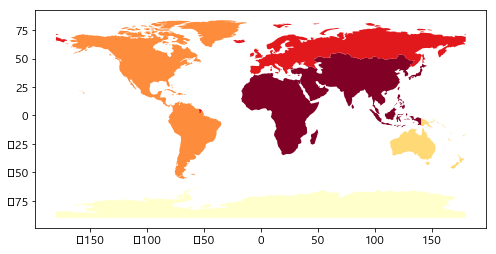

In [124]:
continents.plot(column = 'pop_est', scheme='quantiles', cmap='YlOrRd');